# Ev Fiyat Tahmini

*   **Matplotlib,** Python’da statik, animasyonlu ve etkileşimli görselleştirmeler oluşturmak için kapsamlı bir kütüphanedir.

*   **Seaborn**, MatPlotLib kütüphanesini temel alan bir Python görselleştirme kütüphanesidir. Pandas kütüphanesinin veri yapısına da kolayca entegre edilebilir. Özellikle istatistiksel grafikler için çok kullanışlı bir kod yapısı sağlar. Eğer fazla kod yazmadan grafik oluşturmak isterseniz, kendisine ait kullanışlı geçerli (default) ayarları sayesinde çizim işlemini kolaylaştırır.


*   **Scipy (Scientific Python)**, karmaşık matematiksel veya bilimsel problemlerin hesaplanmasına yardımcı olan açık kaynaklı bir kütüphanedir. Farklı türde sorunları çözmek için bilim ve mühendislikte kullanılabilecek yerleşik bir matematiksel işleve ve kitaplıklara sahiptir.






In [60]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

color = sns.color_palette()
sns.set_style('darkgrid')

In [61]:
#from google.colab import drive
#drive.mount('/content/drive')

In [62]:
#ROOT_DIR = "/content/drive/MyDrive/..."
ROOT_DIR = "https://raw.githubusercontent.com/yavuzKomecoglu/yapay-zeka-egitimi-tubitak-bideb-2237a/main/"
DATASET_PATH = ROOT_DIR + "datasets/house_prices/"

In [63]:
#Şimdi eğitim ve test veri kümelerini içe aktaralım ve pandas dataframe'e kaydedelim.

train = pd.read_csv(DATASET_PATH+'train.csv')
test = pd.read_csv(DATASET_PATH+'test.csv')


**SalePrice - mülkün dolar cinsinden satış fiyatı. Bu, tahmin etmeye çalıştığınız hedef değişkendir.**

MSSubClass: Bina sınıfı

MSZoning: Genel imar sınıflandırması

LotFrontage (Arsa cephesi): Mülke bağlanan caddenin doğrusal fitleri

LotArea: Metrekare cinsinden arsa büyüklüğü

Street: Yol erişim türü

Alley: Sokak erişiminin türü

LotShape: Mülkün genel şekli

LandContour: Mülkün düzlüğü

Kamu Hizmetleri: Mevcut kamu hizmetlerinin türü

LotConfig: Lot yapılandırması

LandSlope: Mülkün eğimi

Neighborhood: Ames şehir sınırları içindeki fiziksel konumlar

Condition1: Ana yola veya demiryoluna yakınlık

Condition2: Ana yola veya demiryoluna yakınlık (eğer ikinci bir yol varsa)

BldgType: Konut tipi

HouseStyle: Konut tarzı

OverallQual: Genel malzeme ve bitiş kalitesi

OverallCond: Genel durum değerlendirmesi

YearBuilt: Orijinal yapım tarihi

YearRemodAdd: Tadilat tarihi

RoofStyle: Çatı tipi

RoofMatl: Çatı malzemesi

Exterior1st: Evin dış kaplaması

Exterior2nd: Evin dış kaplaması (birden fazla malzeme varsa)

MasVnrType: Yığma kaplama tipi

MasVnrArea: Fit kare cinsinden yığma kaplama alanı

ExterQual: Dış malzeme kalitesi

ExterCond: Dış cephedeki malzemenin mevcut durumu

Foundation: Vakıf türü

BsmtQual: Bodrum katının yüksekliği

BsmtCond: Bodrum katının genel durumu

BsmtExposure: Çıkma veya bahçe katı bodrum duvarları

BsmtFinType1: Bodrum kat kalitesi

BsmtFinSF1: Tip 1 bitmiş fit kare

BsmtFinType2: İkinci bitmiş alanın kalitesi (mevcutsa)

BsmtFinSF2: Tip 2 bitmiş fit kare

BsmtUnfSF: Bodrum alanının bitmemiş fit karesi

TotalBsmtSF: Bodrum alanının toplam feet karesi

Heating: Isıtma türü

HeatingQC: Isıtma kalitesi ve durumu

CentralAir: Merkezi klima

Electrical: Elektrik sistemi

1stFlrSF: Birinci Kat feet kare

2ndFlrSF: İkinci kat feet kare

LowQualFinSF: Düşük kaliteli bitmiş fit kare (tüm katlar)

GrLivArea: Sınıf üstü (zemin) yaşam alanı feet kare

BsmtFullBath: Bodrum tam banyo

BsmtHalfBath: Bodrum yarım banyoları

FullBath: Sınıfın üstünde tam banyolar

HalfBath: Sınıf üstü yarım banyolar

Bedroom: Bodrum seviyesinin üzerindeki yatak odası sayısı

Kitchen: Mutfak sayısı

KitchenQual: Mutfak kalitesi

TotRmsAbvGrd: Sınıfın üstündeki toplam odalar (banyolar dahil değildir)

Functional: Ev işlevselliği derecelendirmesi

Fireplaces(Şömineler): Şömine sayısı

FireplaceQu: Şömine kalitesi

GarageType: Garaj konumu

GarageYrBlt: Garajın inşa edildiği yıl

GarageFinish: Garajın iç kaplaması

GarageCars: Araba kapasitesi olarak garaj boyutu

GarageArea: Garajın feet kare cinsinden büyüklüğü

GarageQual: Garaj kalitesi

GarajKond: Garaj durumu

PavedDrive: Asfalt araba yolu

WoodDeckSF: Metrekare cinsinden ahşap güverte alanı

OpenPorchSF: Fit kare cinsinden açık sundurma alanı

EnclosedPorch: Fit kare cinsinden kapalı sundurma alanı

3SsnPorch: Metrekare cinsinden üç mevsim sundurma

ScreenPorch: Metrekare cinsinden perde sundurma alanı

HavuzAlanı: Fit kare cinsinden havuz alanı

PoolQC: Havuz kalitesi

Çit: Çit kalitesi

MiscFeature: Diğer kategorilerde yer almayan çeşitli özellikler

MiscVal: $Çeşitli özelliğin değeri

MoSold: Satılan Ay

YrSold: Satıldığı Yıl

SaleType: Satış türü

SaleCondition: Satış koşulu

In [64]:
#Eğitim veri kümesinin ilk beş satırını görüntüleyin.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
##Test veri kümesinin ilk beş satırını görüntüleyin.
test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [66]:
#Örneklem ve özellik sayılarını kontrol edelim.
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#'Id' sütununu kaydedelim.
train_ID = train['Id']
test_ID = test['Id']

#Şimdi 'Id' sütununu kaldıralım, çünkü tahmin işlemi için gereksizdir.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#'Id' değişkenini kaldırdıktan sonra veri boyutunu tekrar kontrol edelim.
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#Veri İşleme

##Aykırı Değerler

plt kısaltması da matplotlib kütüphanesinin kısaltması olarak kullanılır. Grafikler bu komut ile çizilir.

**plt.plot():** Grafiğin ana komutunu oluşturur. Bu komutun içine ilk önce x ekseni, sonrasında y ekseni yazılır. Grafikteki temel bazı değişkenleri değiştirmek istersek ilgili kodu buraya yazmamız gerekir. Örneğin grafiğin rengi, çizgi kalınlığı, aralıklar vs.

**figsize:**Grafiğin boyutunu belirler. Yaygın olarakplt.figure(figsize=(8,6)) şeklinde kullanılır. Farklı kullanımları da mevcuttur. Parantez içindeki ilk yazılan değer grafiğin eni, ikincisi boyudur.

**plt.xlabel():** x ekseninin başlığını oluşturur.

**plt.ylabel():** y ekseninin başlığını oluşturur.

**plt.title():** Grafiğin başlığını oluşturur.

**plt.show():** Grafiği çizdirmemizi sağlar. Bu kodu yazmazsak grafik çizilir fakat bazen ekranda gözükmeyebilir.

**plt.scatter():** Scatter grafikleri, iki veya daha fazla değişken arasındaki ilişkiyi veya dağılımı görselleştirmek için kullanılır. Genellikle noktaların x ve y koordinatları üzerinde temsil edildiği bu grafik türü, noktaların konumlarına ve boyutlarına göre verileri gösterir. Örneğin, iki değişken arasındaki korelasyonu incelemek veya verilerin gruplarını göstermek için kullanılabilir.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html




**GrLivArea**: Metrekare bazında yaşam alanı

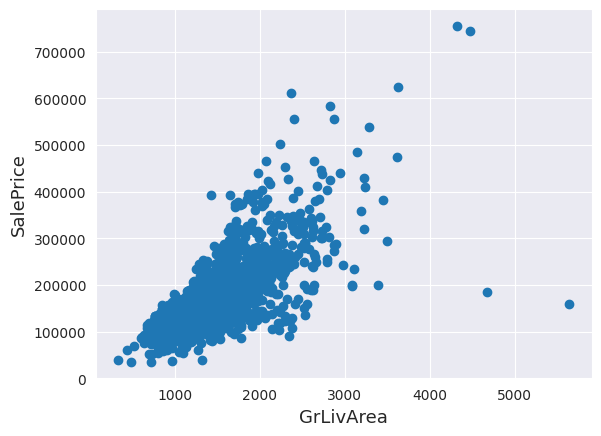

In [67]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Sağ altta son derece büyük `GrLivArea` ile düşük fiyatlı ikisini görebiliriz. Bu değerler gürültü olarak tanımlanır.

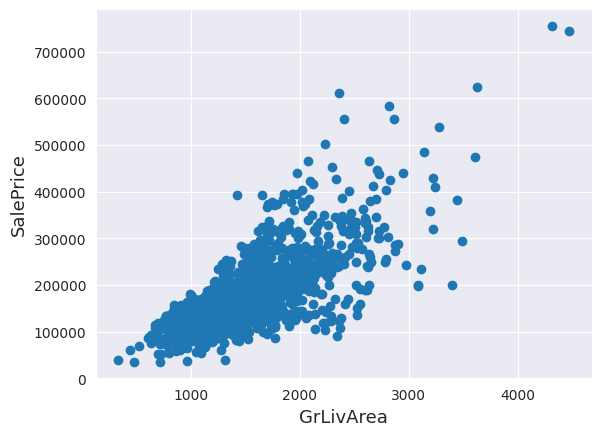

In [70]:
#Aykırı değerleri silelim
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

plt.scatter(train['GrLivArea'], train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

plt.show()

##Hedef Değişken

Normalizasyon (Normalleştirme)
Ölçeklendirme işlemi sadece bizim verilerimizin ölçekleme aralığını değiştirmektedir. Normalleştirme ise çok daha radikal değişiklikler yapılmaktadır. Normalleştirmenin amacı, gözlemlerimizi normal bir dağılım değiştirmektir.

**Normal Dağılım:** Normal dağılım, aynı zamanda Gauss dağılımı veya Gauss tipi dağılım olarak isimlendirilen, birçok alanda pratik uygulaması olan, çok önemli bir sürekli olasılık dağılım ailesidir. Genel olrak, istatistiksel ve makine öğrenmesi pratiklerinde(işlemerinde), verilerimizin normalleştirilmesini ve normal bir dağılım üzerinden yorumlamayı isteriz.


Öncelikle görselleri yerleştirebilmek için “fig” adında bir çerçeve ve çerçevenin içerisine 1 satır ve 2 sütundan oluşan alt yerler (subplots) tanımladık.figsize() parametresi ile de çerçevenin en ve boyutunu “inç” cinsinden belirttik. Her bir grafik için kullandığımız yapıyı ve komutları şöyle özetleyebiliriz:

sns.histplot(): Seaborn kütüphanesinin histogram çizdirebilmek için geliştirdiği komut. Bu komuta parametre olarak grafiğin hangi yerde olacağını (ax) ve hangi veriyi kullanacağını (data) belirttik.

axvline(): Grafiğe istediğimiz noktada yatay düzleme dik gelecek bir çizgi çekmek için kullanılır.

set_title(): Grafiğe başlık yazabilmek için kullanılır.

set_xlabel(): Grafiğin yatay (x) düzlemindeki elemanları tanıtmak için kullanılır.

set_ylabel(): Grafiğin dikey (y) düzlemindeki elemanları tanıtmak için kullanılır.

**SalePrice**,  **tahmin etmemiz gereken değişkendir. Öyleyse önce bu değişken üzerinde biraz analiz yapalım.**

https://seaborn.pydata.org/generated/seaborn.histplot.html

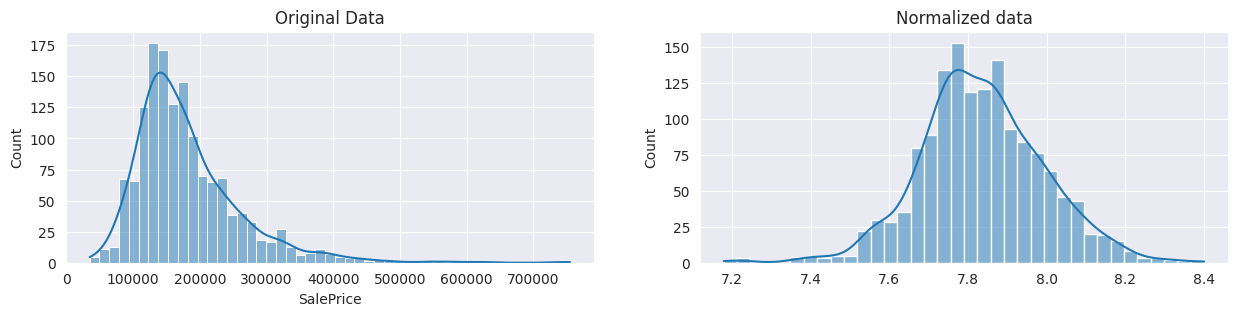

In [11]:
##`scipy.stats` içerisindeki `norm` sınıfını kullanarak eğitim kümesindeki "SalePrice" dağılımının grafiğini çizdiriniz.
# üstel verileri boxcox ile normalize edelim
normalized_data = stats.boxcox(train["SalePrice"])

# karşılaştırmak için ikisini birlikte çizelim
fig, ax=plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(train["SalePrice"], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [12]:
normalized_data

(array([7.92417339, 7.86996219, 7.95111284, ..., 8.01870399, 7.77294408,
        7.78778899]),
 -0.07712954943154764)


 mu = 180932.92 and sigma = 79467.79



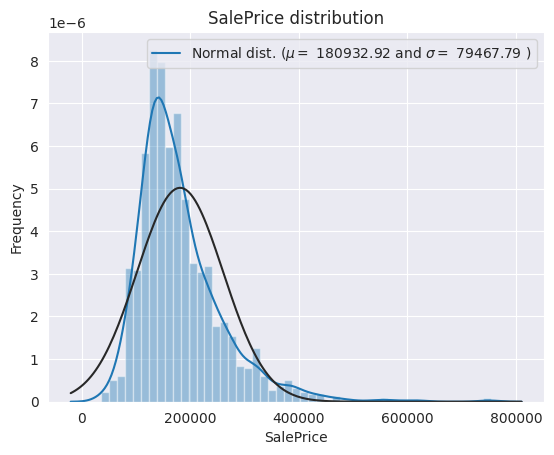

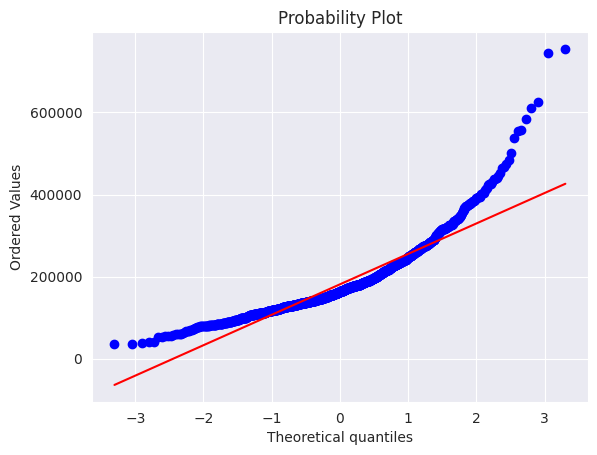

In [13]:
sns.distplot(train['SalePrice'] , fit=norm);

# Fonksiyon tarafından kullanılan uygun parametreleri alalım
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Şimdi dağılımı çizelim
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot'u da alalım
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [14]:
normalized_data

(array([7.92417339, 7.86996219, 7.95111284, ..., 8.01870399, 7.77294408,
        7.78778899]),
 -0.07712954943154764)

In [15]:
len(normalized_data[0])

1458

In [16]:
train['SalePrice'] = normalized_data[0]
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,7.924
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.870
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7.951
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,7.767
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,7.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,7.856
1456,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,7.927
1457,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,8.019
1458,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,7.773


Hedef değişken sağa çarpık.
(Doğrusal) modeller normal dağılımlı verileri sevdiğinden, bu değişkeni dönüştürmemiz ve daha normal dağılımlı hale getirmemiz gerekiyor.

**Hedef değişkenin günlük dönüşümü**


 mu = 2.18 and sigma = 0.02



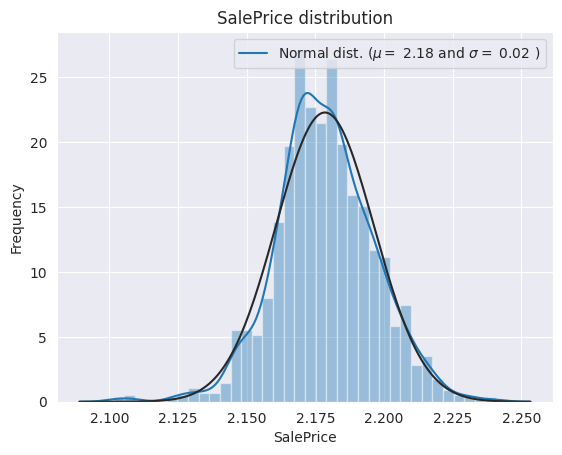

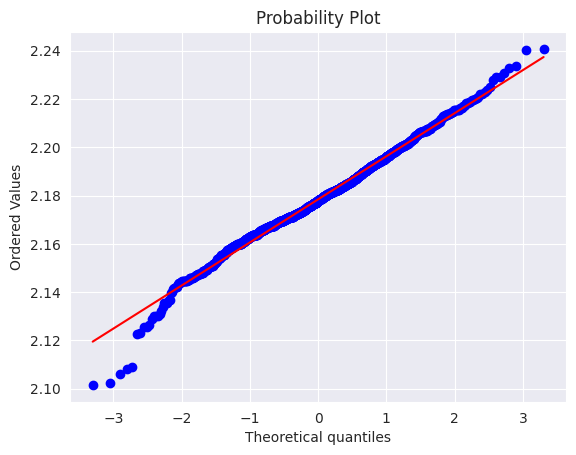

In [17]:
#Sütunun tüm elemanlarına log(1+x) uygulayan log1p numpy fonksiyonunu kullanırız
train["SalePrice"] = np.log1p(train["SalePrice"])

#Yeni dağılımı kontrol edelim
sns.distplot(train['SalePrice'] , fit=norm);

# Fonksiyon tarafından kullanılan uygun parametreleri alalım
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Şimdi dağılımı çizelim
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#QQ-plot'u da alalım
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


Eğrilik şimdi düzeltilmiş görünüyor ve veriler daha normal dağılmış görünüyor.

##Öznitelik Mühendisliği

Önce train ve test dataframe'lerini birleştirerek tek bir dataframe haline getirelim

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


###Kayıp Veri (Missing Data)

In [19]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

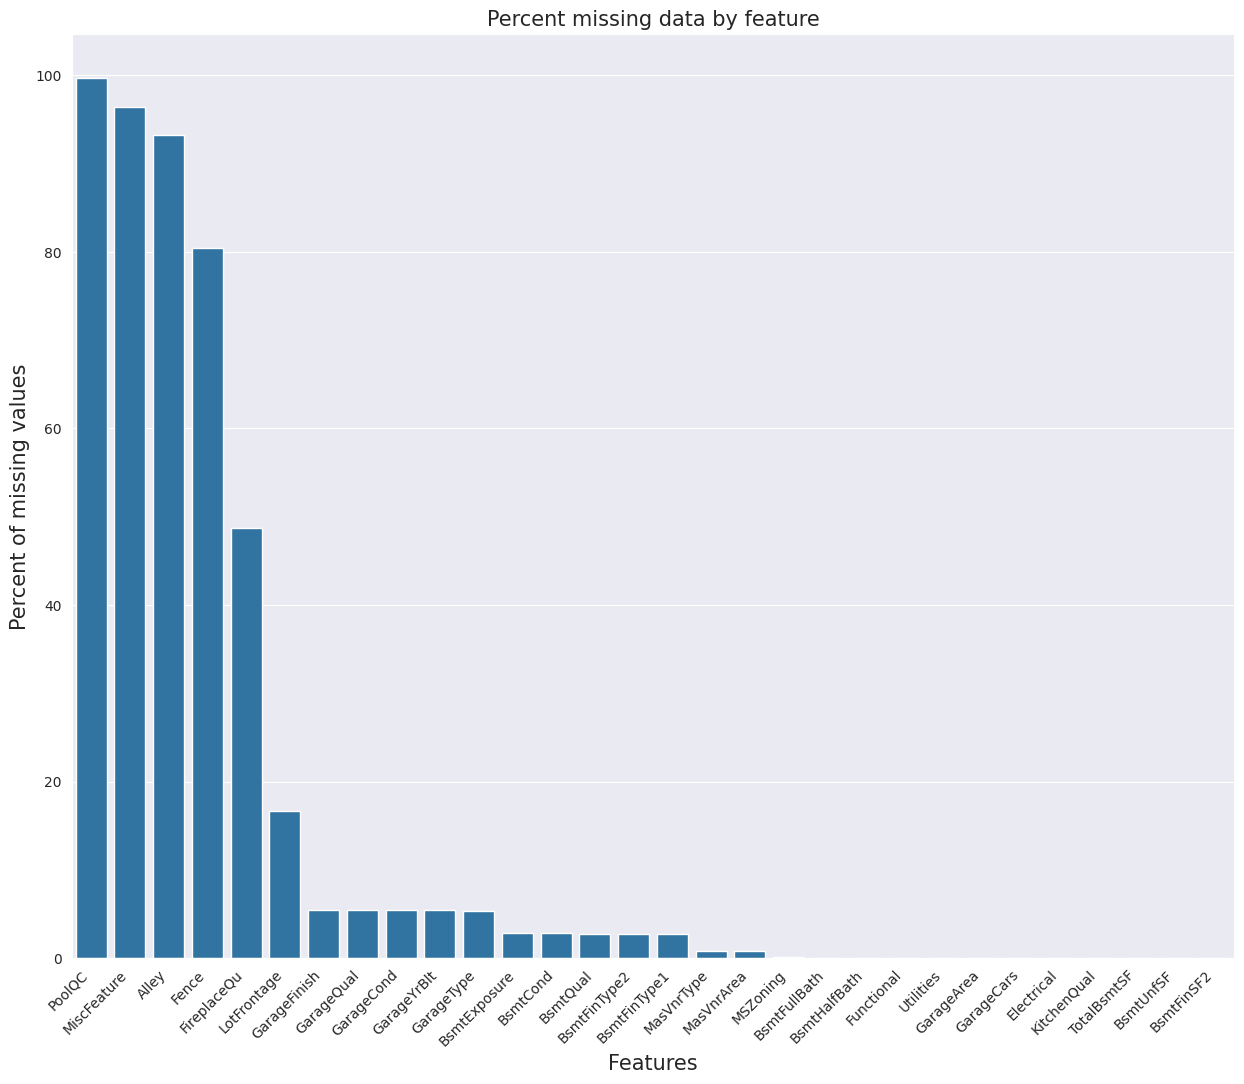

In [20]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=45, ha='right')

sns.barplot(x=all_data_na.index, y=all_data_na)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Veri Korelasyonu**

In [21]:
corrmat = train.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.405,-0.142,0.033,-0.059,0.028,0.041,0.023,-0.074,-0.066,...,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.072
LotFrontage,-0.405,1.000,0.389,0.235,-0.056,0.117,0.081,0.164,0.147,0.055,...,0.082,0.117,0.015,0.075,0.046,0.116,0.005,0.026,0.008,0.370
LotArea,-0.142,0.389,1.000,0.091,-0.003,0.007,0.008,0.085,0.175,0.114,...,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.257
OverallQual,0.033,0.235,0.091,1.000,-0.090,0.571,0.550,0.403,0.222,-0.058,...,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.818
OverallCond,-0.059,-0.056,-0.003,-0.090,1.000,-0.376,0.075,-0.127,-0.043,0.040,...,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.029
YearBuilt,0.028,0.117,0.007,0.571,-0.376,1.000,0.592,0.313,0.250,-0.049,...,0.224,0.184,-0.387,0.032,-0.050,-0.005,-0.034,0.013,-0.013,0.589
YearRemodAdd,0.041,0.081,0.008,0.550,0.075,0.592,1.000,0.176,0.123,-0.067,...,0.205,0.223,-0.194,0.046,-0.038,-0.003,-0.010,0.022,0.036,0.568
MasVnrArea,0.023,0.164,0.085,0.403,-0.127,0.313,0.176,1.000,0.239,-0.072,...,0.157,0.105,-0.109,0.020,0.063,-0.021,-0.030,-0.004,-0.007,0.426
BsmtFinSF1,-0.074,0.147,0.175,0.222,-0.043,0.250,0.123,0.239,1.000,-0.050,...,0.205,0.073,-0.104,0.029,0.068,0.053,0.005,-0.004,0.016,0.388
BsmtFinSF2,-0.066,0.055,0.114,-0.058,0.040,-0.049,-0.067,-0.072,-0.050,1.000,...,0.068,0.005,0.036,-0.030,0.089,0.046,0.005,-0.015,0.032,0.007


<Axes: >

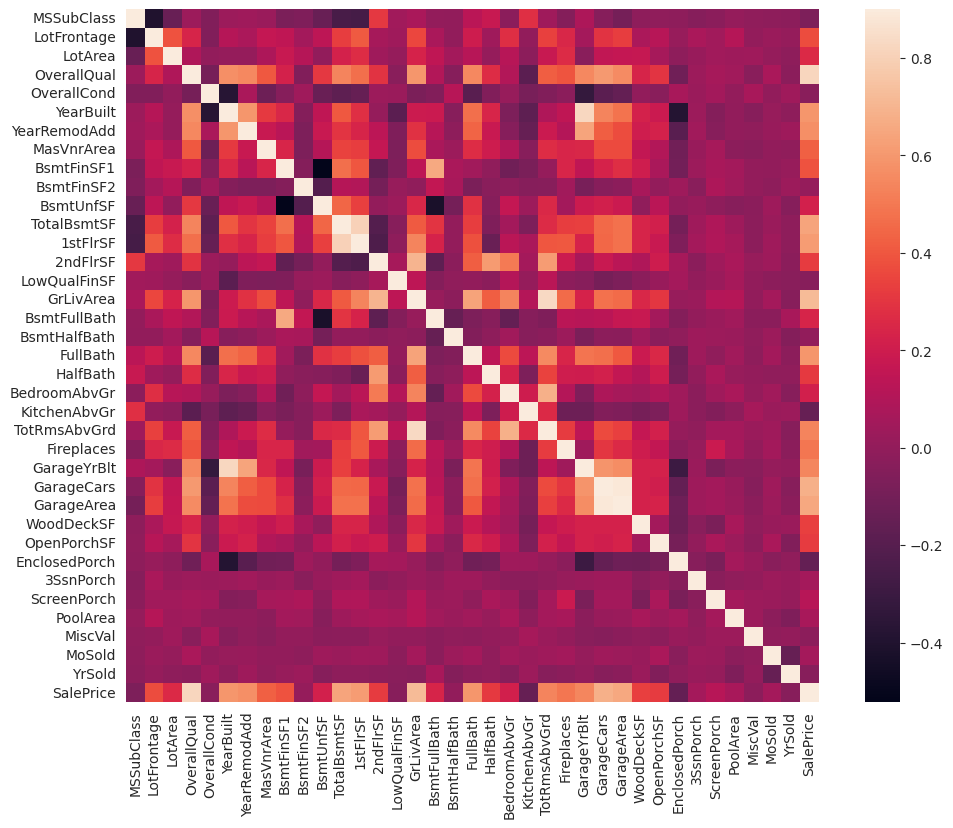

In [22]:
#Özelliklerin SalePrice ile nasıl ilişkili olduğunu görmek için korelasyon haritası çizelim
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

###Eksik Değerleri Tamamlama

- **PoolQC** : verisinin NA olması "Havuz Yok" anlamına geldiğini söylüyor.
Çok büyük bir kayıp değer oranı (+%99) göz önüne alındığında bu mantıklıdır ve evlerin çoğunda genel olarak hiç Havuz yoktur.

In [23]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : verisinin NA olması "çeşitli özellik yok" anlamına geldiğini söylüyor.

In [24]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : verisinin NA olması "ara sokak erişimi yok" anlamına geldiğini söylüyor.

In [25]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence(Çit)** : verisinin, NA olması "çit yok" anlamına geldiğini söylüyor.

In [26]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : verisinin NA olması "şömine yok" anlamına geldiğini söylüyor.

In [27]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Evin sokakta kapladığı alan, eğer bu değer eksikse sokaktaki diğer evlerin kapladığı alanın ortanca (median) değeri ile doldurulabilir.

In [28]:
all_data.groupby("Neighborhood")["LotFrontage"]

In [29]:
#Mahalleye göre gruplandır ve eksik değeri tüm mahallenin ortanca LotFrontage'ına göre doldur
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual ve GarageCond** : Eksik verileri Yok(None) ile değiştirme

In [30]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea ve GarageCars** : Eksik verilerin 0 ile değiştirilmesi (Garaj alanı yoksa garaj olmadığı için araç da yoktur.)


In [31]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath ve BsmtHalfBath** : bodrum olmadığı için eksik değerler muhtemelen sıfırdır.

In [32]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 ve BsmtFinType2** : Tüm bu kolonlar bodrumla ilgili özniteliklerin NaN değerinde olması bodrum olmadığı anlamına gelir.

In [33]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea ve MasVnrType** : NA büyük olasılıkla bu evler için duvar kaplaması olmadığı anlamına gelir. Alan için 0, tip için None doldurabiliriz.

In [34]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (Genel imar sınıflandırması)** : 'RL' açık ara en yaygın değerdir. Böylece eksik değerleri 'RL' ile doldurabiliriz.

Not: Bir dizi değerin modu, en sık görünen değerdir. Birden çok değer olabilir.

In [35]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [36]:
all_data['MSZoning'].mode()

0    RL
Name: MSZoning, dtype: object

In [37]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : Bu kategorik özellik için bir "NoSeWa" ve 2 NA hariç tüm kayıtlar "AllPub" şeklindedir.

'NoSewa' içeren ev eğitim setinde olduğundan, **bu özellik tahmine dayalı modellemeye yardımcı olmaz**. Daha sonra güvenle kaldırabiliriz.

In [38]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional: Ev işlevsellik derecesi
- **Functional** : Verisinin NA olması evin tipik bir ev olduğu anlamına geldiğini söylüyor.

In [39]:
all_data["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [40]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : Bir adet NA değerine sahiptir. Bu öznitelik çoğunlukla 'SBrkr' olduğundan, bu değer ile değiştirebiliriz.

In [41]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual**: Yalnızca bir NA değeri ve Electrical ile aynı, KitchenQual'da eksik değer için 'TA' (en sık görülen) belirledik.

In [42]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : İki öznitelik içinde yalnızca bir eksik değer olduğundan en yaynın değeri (mode()) atayabiliriz.


In [43]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : En sık kullanılan "WD" ile doldurabiliriz.

In [44]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Na büyük olasılıkla Bina sınıfı yok anlamına gelir. Eksik değerleri Yok(None) ile değiştirebiliriz

In [45]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Kalan eksik değer var mı?

In [46]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Eksik değer kalmadı.

**Sahte kategorik özellikler elde etme**

In [47]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 299)


In [48]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,7,5,2003,2003,196.000,706.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000,9600,6,8,1976,1976,0.000,978.000,0.000,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000,11250,7,5,2001,2002,162.000,486.000,0.000,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000,9550,7,5,1915,1970,0.000,216.000,0.000,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000,14260,8,5,2000,2000,350.000,655.000,0.000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,21.000,1936,4,7,1970,1970,0.000,0.000,0.000,...,0,0,0,1,0,0,0,0,1,0
2913,160,21.000,1894,4,5,1970,1970,0.000,252.000,0.000,...,0,0,0,1,1,0,0,0,0,0
2914,20,160.000,20000,5,7,1960,1996,0.000,1224.000,0.000,...,0,0,0,1,1,0,0,0,0,0
2915,85,62.000,10441,5,5,1992,1992,0.000,337.000,0.000,...,0,0,0,1,0,0,0,0,1,0


Yeni eğitim ve test setleri alalım.

In [49]:
train.shape

(1458, 80)

In [50]:
train = all_data[:ntrain]
test = all_data[ntrain:]

#Modelleme

In [51]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Sklearn'in **cross_val_score** fonksiyonunu kullanıyoruz. Ancak bu fonksiyonun karıştırma özelliği olmadığından öncesinde KFold ile karıştırıyoruz.

In [53]:
#Doğrulama fonksiyonu
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**XGBoost** :

In [54]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



###Model Skoru

Çapraz doğrulama rmsle hatasını değerlendirerek modelin veriler üzerinde nasıl performans gösterdiğini görelim

In [55]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0156 (0.0009)



In [56]:
score

array([0.0148217 , 0.0170807 , 0.01603196, 0.01491146, 0.01503663])